In [1]:
%matplotlib inline
import time
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pi_estimate.estimator as es

counts, estims, times = [],[],[]

for n in range(0,5):

    counts.append(10**(n+2))
    print "n="+str(counts[n]).ljust(9),
    
    start_time = time.time()
    
    estims.append(es.pi_estimator(10**(n+2)).estimate)
    print str(estims[n]).ljust(8),    
    
    times.append((time.time()-start_time))
    print "%.4f seconds" %times[n]
    

n=100       3.0      0.0003 seconds
n=1000      3.156    0.0023 seconds
n=10000     3.1372   0.0182 seconds
n=100000    3.13244  0.1747 seconds
n=1000000   3.139732 1.7513 seconds


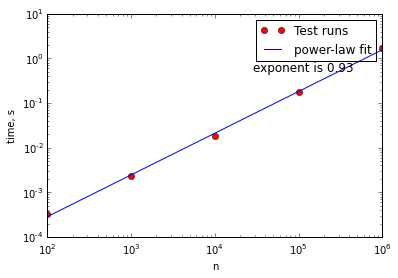

In [6]:
A = np.vstack([np.log(counts), np.ones(len(counts))]).T
m,c = np.linalg.lstsq(A, np.log(times))[0]



plt.loglog(counts,times,'ro',label='Test runs')
plt.loglog(counts,np.exp(m*np.log(counts)+c),label='power-law fit')
plt.legend()
plt.figtext(0.6,0.7,"exponent is %.2f"%m, fontsize = 12)

plt.ylabel('time, s')
plt.xlabel('n')
plt.show()

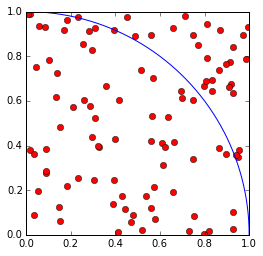

In [7]:
es100 = es.pi_estimator(100)
x = es100.tosses[:,0]
y = es100.tosses[:,1]
plt.plot(x,y,'ro')
theta = np.linspace(0,np.pi/2,num=50)
plt.plot(np.cos(theta),np.sin(theta))
plt.gca().set_aspect('equal')
plt.gca().set_xbound(lower=0,upper=1)
plt.gca().set_ybound(lower=0,upper=1)
plt.show()

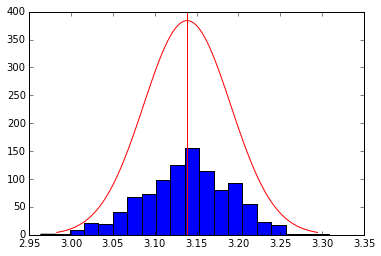

In [8]:
import matplotlib.mlab as mlab

runs=1000
n=1000
estimates = np.empty([runs])

for i in range(runs):
    estimates[i] = es.pi_estimator(n).estimate
plt.hist(estimates,bins=runs/50)

mean = np.mean(estimates)
sigma = np.std(estimates)


plt.axvline(mean,color='r')
x = np.linspace(mean-3*sigma,mean+3*sigma,100)
plt.plot(x,50*mlab.normpdf(x,mean,sigma),color='r')

plt.show()

In [9]:
es100.tosses[:,1]

array([ 0.9290294 ,  0.02068702,  0.24621488,  0.01795392,  0.66670395,
        0.36210303,  0.02632812,  0.38168308,  0.41638946,  0.17594005,
        0.61551745,  0.93712476,  0.78660007,  0.0191639 ,  0.11551335,
        0.94307858,  0.77241301,  0.67594877,  0.8963646 ,  0.64281705,
        0.27699135,  0.91559555,  0.98938849,  0.66108333,  0.43771434,
        0.79353204,  0.989571  ,  0.78462391,  0.12496661,  0.92739762,
        0.12045463,  0.52345874,  0.97619871,  0.53210636,  0.64485499,
        0.08460096,  0.4099886 ,  0.25400378,  0.00456238,  0.24666412,
        0.74056828,  0.70076837,  0.21887708,  0.93134656,  0.74984587,
        0.37850844,  0.89296875,  0.42911235,  0.17249772,  0.52602319,
        0.91914074,  0.3374071 ,  0.13628921,  0.97411214,  0.34635817,
        0.05779575,  0.10281257,  0.91149447,  0.9262069 ,  0.01258758,
        0.97891997,  0.89647459,  0.28583224,  0.1917374 ,  0.68894125,
        0.63447061,  0.91724631,  0.69421128,  0.06115391,  0.39

In [10]:
counts, estims = [],[]

for n in np.arange(2,16):

    counts.append(int(np.exp(n)))
    print "n="+str(counts[-1]).ljust(9),
    
    estims.append(es.pi_estimator(int(np.exp(n))).estimate)
    print str(estims[-1]).ljust(8)


n=7         2.85714285714
n=20        3.4     
n=54        2.96296296296
n=148       3.27027027027
n=403       3.16625310174
n=1096      3.13868613139
n=2980      3.08993288591
n=8103      3.14895717635
n=22026     3.14264959593
n=59874     3.13611918362
n=162754    3.14098578222
n=442413    3.13999814653
n=1202604   3.14076786706
n=3269017   3.14029691494


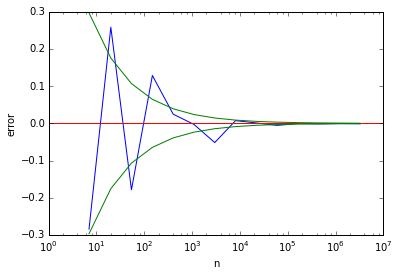

In [26]:
cous=np.array(counts)
ests=np.array(estims)
plt.semilogx(counts, ests-np.pi)
plt.axhline(0,color='r')

sigmas=np.sqrt(np.pi**2/16/cous)
plt.semilogx(counts, sigmas,color='g')
plt.semilogx(counts,-sigmas,color='g')

plt.ylabel('error')
plt.xlabel('n')

plt.show()